In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# pip install yfinance
import yfinance as yf

In [ ]:
trading_days = 252
ticker_CSCO = yf.Ticker('CSCO') #Cisco - tentative company
ticker_TMUS = yf.Ticker('NTGR') #
ticker_GSPC = yf.Ticker('^GSPC') #Arista Networks
prices_CSCO = ticker_CSCO.history(period='5y')['Close']
prices_TMUS = ticker_TMUS.history(period='5y')['Close']
prices_GSPC = ticker_GSPC.history(period='5y')['Close']
daily_returns_CSCO = prices_CSCO.pct_change().dropna()
daily_returns_TMUS = prices_TMUS.pct_change().dropna()
daily_returns_GSPC = prices_GSPC.pct_change().dropna()
daily_returns_CSCO

Date
2018-11-23 00:00:00-05:00   -0.007797
2018-11-26 00:00:00-05:00    0.023125
2018-11-27 00:00:00-05:00    0.012069
2018-11-28 00:00:00-05:00    0.025368
2018-11-29 00:00:00-05:00    0.001058
                               ...   
2023-11-14 00:00:00-05:00    0.017997
2023-11-15 00:00:00-05:00    0.002069
2023-11-16 00:00:00-05:00   -0.098348
2023-11-17 00:00:00-05:00   -0.005829
2023-11-20 00:00:00-05:00    0.010678
Name: Close, Length: 1256, dtype: float64

In [ ]:
benchmark = yf.Ticker('^TNX')
ten_yr_yield = benchmark.history(period='5y')['Close'][1:] * 0.01
risk_free_rate = ten_yr_yield / (trading_days * 10)

In [ ]:
ten_yr_yield

Date
2018-11-21 00:00:00-05:00    0.03061
2018-11-23 00:00:00-05:00    0.03054
2018-11-26 00:00:00-05:00    0.03072
2018-11-27 00:00:00-05:00    0.03055
2018-11-28 00:00:00-05:00    0.03044
                              ...   
2023-11-14 00:00:00-05:00    0.04441
2023-11-15 00:00:00-05:00    0.04535
2023-11-16 00:00:00-05:00    0.04445
2023-11-17 00:00:00-05:00    0.04441
2023-11-20 00:00:00-05:00    0.04422
Name: Close, Length: 1257, dtype: float64

In [ ]:
def rolling_sharpe(daily_returns, risk_free_rate, period):
  D_t = (daily_returns - risk_free_rate).rolling(period)
  D_bar = D_t.mean()
  sigma_D = D_t.std()
  return (math.sqrt(period)*D_bar / sigma_D).dropna()

In [ ]:
annualized_rs_CSCO = rolling_sharpe(daily_returns_CSCO, risk_free_rate, trading_days)
annualized_rs_TMUS = rolling_sharpe(daily_returns_TMUS, risk_free_rate, trading_days)
annualized_rs_GSPC = rolling_sharpe(daily_returns_GSPC, risk_free_rate, trading_days)

annualized_rs_CSCO

Date
2019-11-22 00:00:00-05:00    0.226470
2019-11-25 00:00:00-05:00    0.306574
2019-11-26 00:00:00-05:00    0.208035
2019-11-27 00:00:00-05:00    0.156419
2019-11-29 00:00:00-05:00    0.066031
                               ...   
2023-11-14 00:00:00-05:00    1.131679
2023-11-15 00:00:00-05:00    1.148395
2023-11-16 00:00:00-05:00    0.545097
2023-11-17 00:00:00-05:00    0.571417
2023-11-20 00:00:00-05:00    0.400621
Name: Close, Length: 1005, dtype: float64

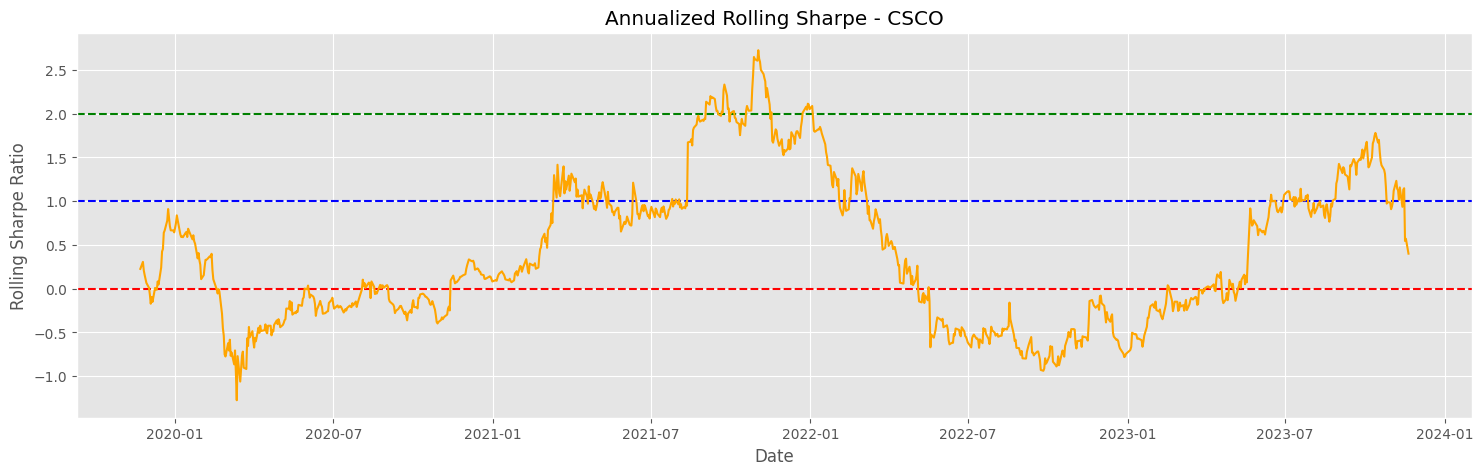

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(18,5))
plt.title('Annualized Rolling Sharpe - CSCO')
plt.ylabel('Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.axhline(y = 0, color = 'red', linestyle = 'dashed')
plt.axhline(y = 1, color = 'blue', linestyle = 'dashed')
plt.axhline(y = 2, color = 'green', linestyle = 'dashed')
plt.plot(annualized_rs_CSCO, color = 'orange')

In [ ]:
percentage_below_0 = round(np.count_nonzero(annualized_rs_CSCO < 0.0) / len(annualized_rs_CSCO) * 100,2)

percentage_above_0 = round(np.count_nonzero(annualized_rs_CSCO > 0.0) / len(annualized_rs_CSCO) * 100,2)

percentage_above_0 - percentage_below_0


18.200000000000003

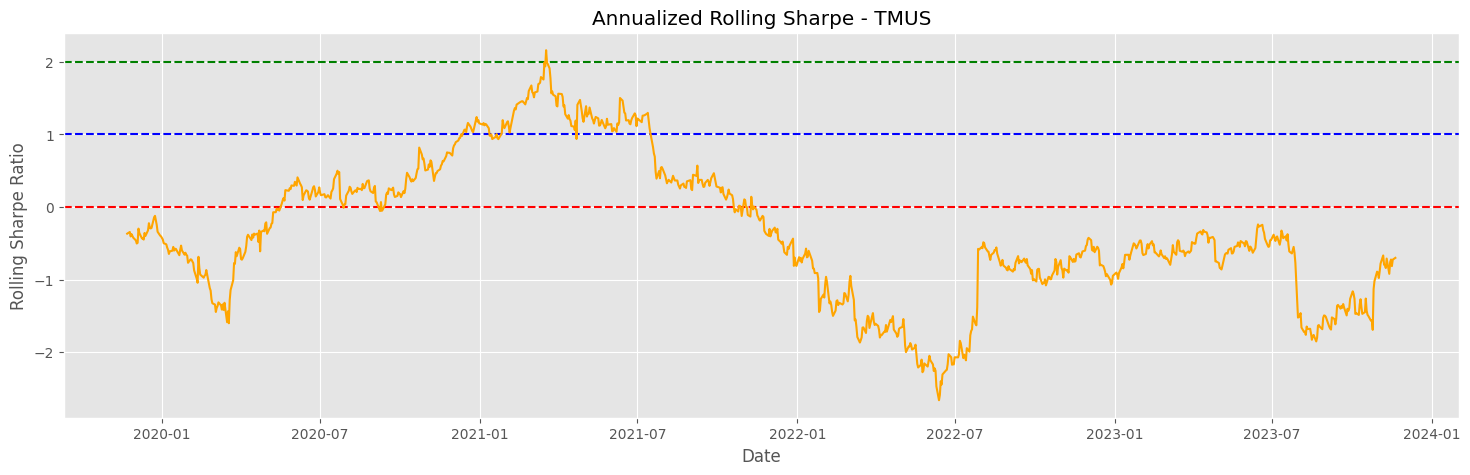

In [ ]:
plt.figure(figsize=(18,5))
plt.title('Annualized Rolling Sharpe - TMUS')
plt.ylabel('Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.axhline(y = 0, color = 'red', linestyle = 'dashed')
plt.axhline(y = 1, color = 'blue', linestyle = 'dashed')
plt.axhline(y = 2, color = 'green', linestyle = 'dashed')
plt.plot(annualized_rs_TMUS, color = 'orange')

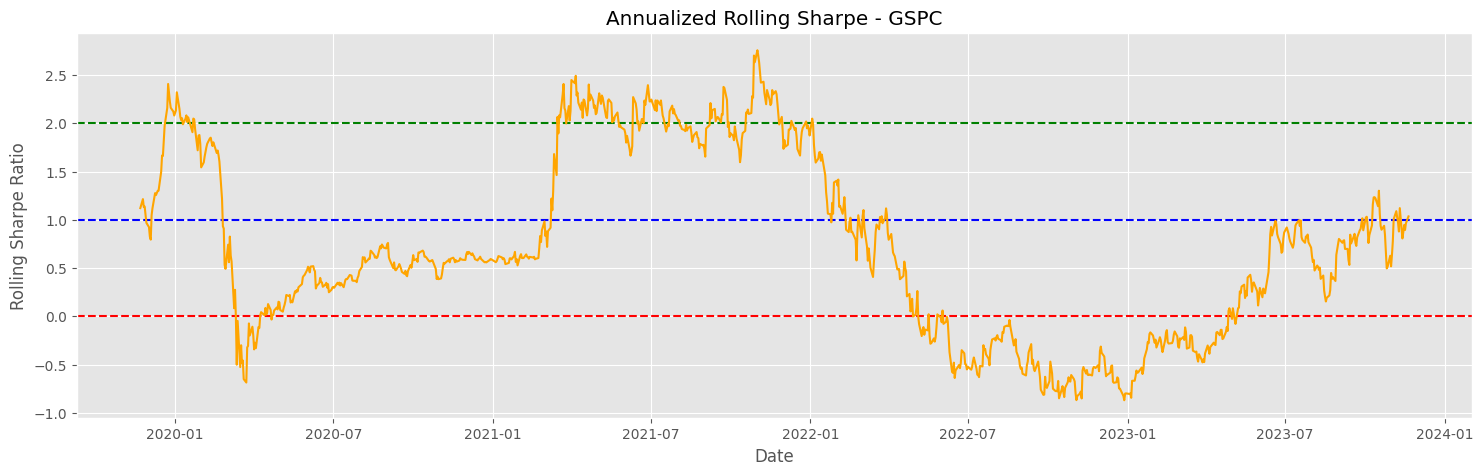

In [ ]:
plt.figure(figsize=(18,5))
plt.title('Annualized Rolling Sharpe - GSPC')
plt.ylabel('Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.axhline(y = 0, color = 'red', linestyle = 'dashed')
plt.axhline(y = 1, color = 'blue', linestyle = 'dashed')
plt.axhline(y = 2, color = 'green', linestyle = 'dashed')
plt.plot(annualized_rs_GSPC, color = 'orange')

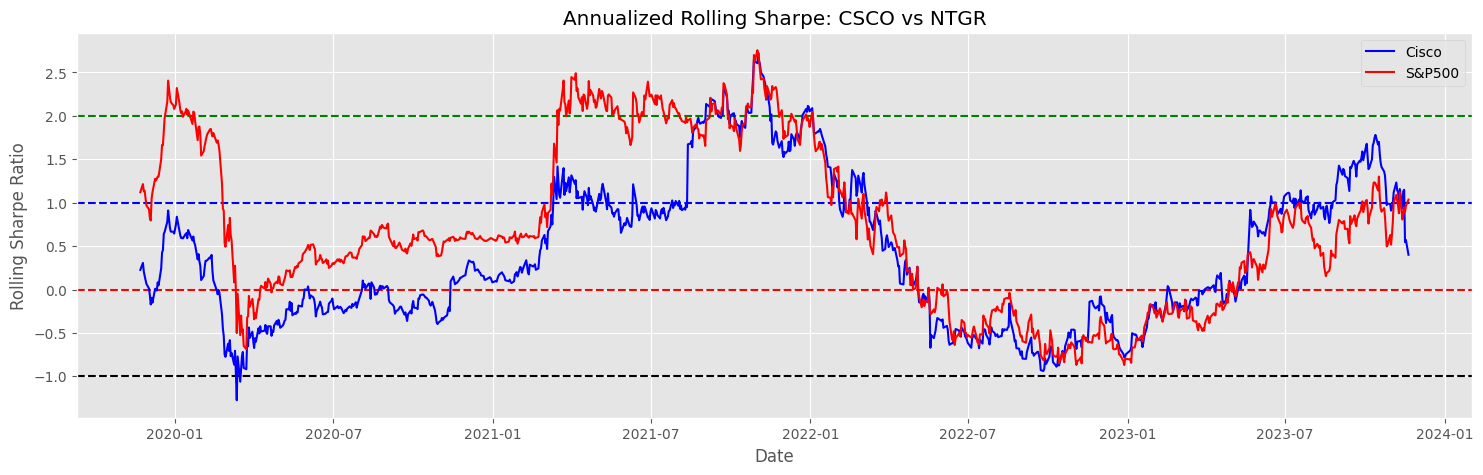

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(18,5))
plt.title('Annualized Rolling Sharpe: CSCO vs NTGR')
plt.ylabel('Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.axhline(y = -1, color = 'black', linestyle = 'dashed')
plt.axhline(y = 0, color = 'red', linestyle = 'dashed')
plt.axhline(y = 1, color = 'blue', linestyle = 'dashed')
plt.axhline(y = 2, color = 'green', linestyle = 'dashed')
plt.plot(annualized_rs_CSCO, color = 'blue', label= 'Cisco')
# plt.plot(annualized_rs_TMUS, color = 'orange', label= 'NETGEAR')
plt.plot(annualized_rs_GSPC, color = 'red', label = 'S&P500')
plt.legend()

